In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

## daily and monthly correlation

daily
E
S
W
N
C
A


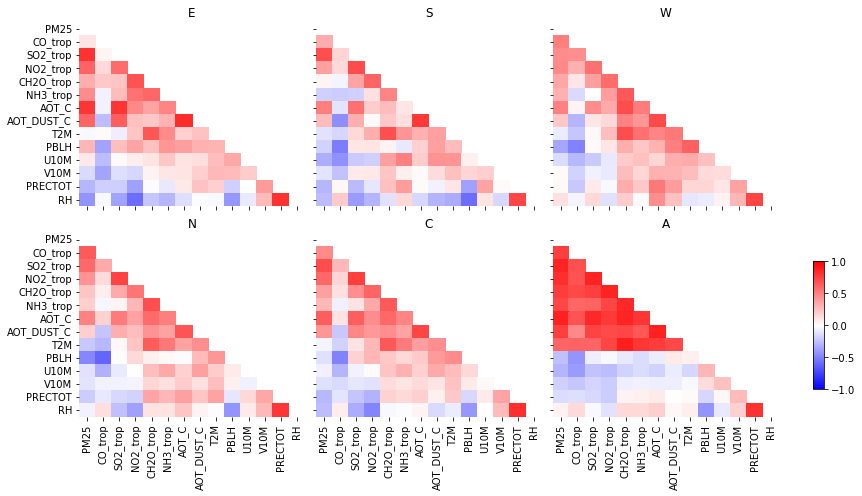

##############################
monthly
E
S
W
N
C
A


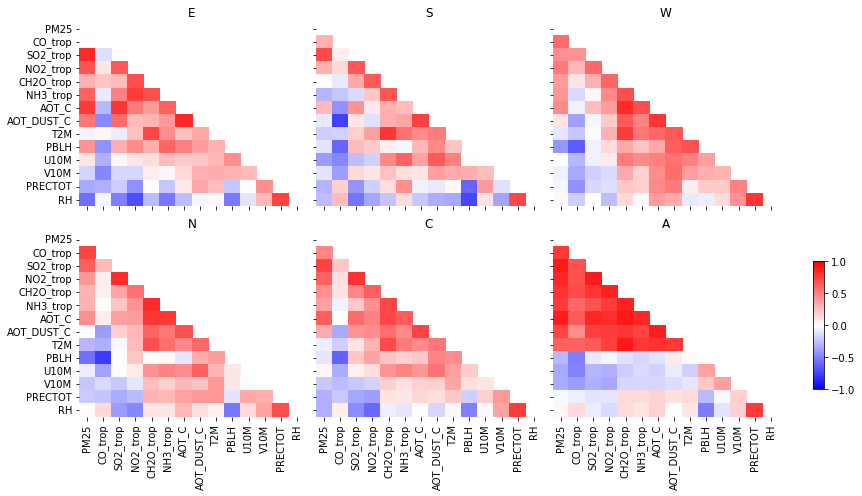

##############################


In [2]:
t_ls = ["daily","monthly"]
for i in range(len(t_ls)):
    fig, axn = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(12,7))
    t = t_ls[i]
    print(t)
    df_train = pd.read_parquet('../data/c_r_'+t+'_train.gzip')
    feature_dict = {
    "gas":['CO_trop', 'SO2_trop', 'NO2_trop', 'CH2O_trop', 'NH3_trop'],
    "aod":['AOT_C', 'AOT_DUST_C'],
    "met":['T2M', 'PBLH', 'U10M', 'V10M', 'PRECTOT', 'RH']}
    # ref https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists
    feature_ls = sum([feature_dict[k] for k in ["gas","aod","met"]],[])
    var = ["PM25"]+feature_ls
    for ax, region in zip((axn.flat)[:4],["E","S","W","N"]):
        print(region)
        corr = df_train[df_train["region"]==region][var].corr(method='spearman')
        mask = np.triu(np.ones_like(corr, dtype=bool))
        sns.heatmap(corr, mask=mask, cmap="bwr",vmin=-1,vmax=1,ax=ax,cbar=False)
        ax.set_title(region)
#         plt.show()
    
    print("C")
    ax = (axn.flat)[4]
    corr = df_train[var].corr(method='spearman')
    sns.heatmap(corr, mask=mask, cmap="bwr",vmin=-1,vmax=1,ax=ax,cbar=False)
    ax.set_title("C")
#     plt.show()
    
    print("A")
    ax = (axn.flat)[5]
    df_train = pd.read_parquet('../data/'+t+'_train.gzip')
    corr = df_train[var].corr(method='spearman')
    p = sns.heatmap(corr, mask=mask, cmap="bwr",vmin=-1,vmax=1,ax=ax,cbar=False)
    ax.set_title("A")
    cax = ax.inset_axes([1.15, 0.15, 0.05, 0.7], transform=ax.transAxes)
    clb = plt.colorbar(ax.collections[0],orientation='vertical',fraction=0.038,extend='neither',ax=ax,cax=cax)
#     clb.ax.set_title('num.')
    
    plt.tight_layout()
    plt.savefig("../figures/corr_"+t+".pdf")
    plt.show()
    
    print("##############################")